In [1]:
import pandas as pd

df = pd.read_csv("dataset.csv")
df

,kill,assist,death,turret,role
0,10,2,3,2,penyerang
1,3,9,5,0,bertahan
2,8,4,2,1,penyerang
3,2,11,6,0,bertahan
4,12,3,2,3,penyerang
5,4,10,7,0,bertahan
6,9,5,2,2,penyerang
7,1,13,6,0,bertahan
8,11,4,3,2,penyerang
9,2,12,5,0,bertahan


In [2]:
df.head(2)

,kill,assist,death,turret,role
0,10,2,3,2,penyerang
1,3,9,5,0,bertahan


In [3]:
df.tail(2)

,kill,assist,death,turret,role
8,11,4,3,2,penyerang
9,2,12,5,0,bertahan


<function matplotlib.pyplot.show(close=None, block=None)>

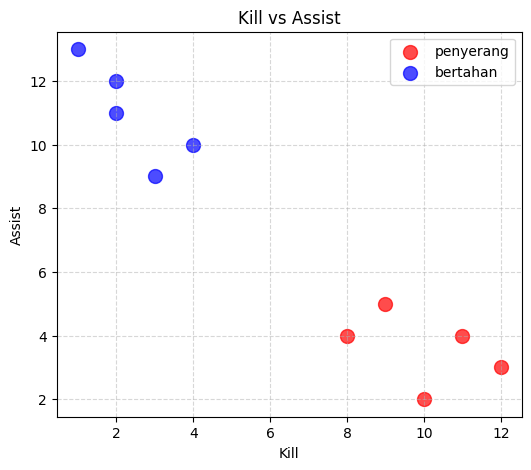

In [7]:
import matplotlib.pyplot as plt

penyerang = df[df["role"] == "penyerang"]
bertahan = df[df["role"] == "bertahan"]

plt.figure(figsize=(6,5))

plt.scatter(penyerang["kill"], penyerang["assist"], color="red",
           s=100, alpha=0.7, label="penyerang")
plt.scatter(bertahan["kill"], bertahan["assist"], color="blue",
            s=100, alpha=0.7, label="bertahan")
plt.xlabel("Kill")
plt.ylabel("Assist")
plt.title("Kill vs Assist")
plt.legend()
plt.grid(True,linestyle="--",alpha=0.5)
plt.show


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df[["kill","assist","death","turret"]]
y = df["role"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Akurasi :", accuracy_score(y_pred, y_test))

Akurasi : 1.0


In [14]:
data_baru = pd.DataFrame([[6,6,4,4]], columns=["kill","assist","death","turret"])
model.predict(data_baru)

array(['penyerang'], dtype=object)

In [18]:
data_lain = pd.DataFrame([[12,4,1,8]], columns=["kill","assist","death","turret"])
model.predict(data_lain)[0]

'penyerang'

In [19]:
import joblib

joblib.dump(model,"model_mlbb.joblib")

['model_mlbb.joblib']

In [ ]:
import joblib
model_tersimpan = joblib.load("model_mlbb.joblib")
data_baru_lagi = pd.DataFrame([[3,4,5,6]],
                              columns = ["kill","assist","death","turret"])
model_tersimpan.predict(data_baru_lagi)